In [1]:
%config InlineBackend.figure_formats = ['svg']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pickle

In [3]:
import matplotlib
matplotlib.rcParams['font.family']
matplotlib.rcParams['font.sans-serif'] = ['Arial']

In [4]:
directory = './new_per_imp_data/'

In [5]:
df_refill_svm = pd.read_csv(directory + 'no_bootstrap_correlated_group_imps_df_linear_svc_refill.csv')
df_refill_xgb = pd.read_csv(directory + 'no_bootstrap_correlated_group_imps_df_xgb_refill.csv')
df_pu_svm = pd.read_csv(directory + 'no_bootstrap_correlated_group_imps_df_linear_svc_pu.csv')
df_pu_xgb = pd.read_csv(directory + 'no_bootstrap_correlated_group_imps_df_xgb_pu.csv')

In [6]:
feature_group_dict = {
    749: 'Surgery type',
    724: 'Opioid prescription within 30 days prior to surgery admission',
    741: 'Region of residence',
    739: 'Tobacco use',
    728: 'Preoperative benzodiazepine use',
    695: 'Age at surgery',
    708: 'Functional bowel disorder',
    743: 'Gender',
    748: 'Race',
    745: 'Net worth',
    956: 'Hydrocortisone Acetate, recency of fills',
    316: 'Hydrocortisone Acetate, quantity of fills',
    693: 'Abdominal pain',
    696: 'Alcohol-related disorders',
    731: 'History of mental health and substance abuse',
    715: 'Inpatient admission',
    
    726: 'Other non-traumatic joint disorders',
    733: 'Spondylosis; intervertebral disc disorders; other back problems',
    701: 'Charlson Cormorbidity Index',
    698: 'Arthritis and joint pain',
    700: 'Back pain',
    709: 'Headache/head pain/suboccipital headache',
    725: 'Osteoarthritis',
    720: 'Noncardiac or nonmusculoskeletal chest pain',
    747: 'Above/below 400% poverty line',
    742: 'Education level',
    
    361: 'Lamotrigine, quantity of fills',
    710: 'Headache, including migraine',
    707: 'Fibromyalgia',
}

In [7]:
df_refill_svm['Feature Group'] = df_refill_svm['Unnamed: 0'].apply(lambda i: feature_group_dict.get(i, i))
df_refill_xgb['Feature Group'] = df_refill_xgb['Unnamed: 0'].apply(lambda i: feature_group_dict.get(i, i))
df_pu_svm['Feature Group'] = df_pu_svm['Unnamed: 0'].apply(lambda i: feature_group_dict.get(i, i))
df_pu_xgb['Feature Group'] = df_pu_xgb['Unnamed: 0'].apply(lambda i: feature_group_dict.get(i, i))

In [8]:
df_refill_svm.sort_values(by=['means'], ascending=False).iloc[:15]

,Unnamed: 0,groups,means,stds,Feature Group
749,749,"['surg_gp_value_Major Surgery', 'surg_gp_value...",0.029961,0.001182,Surgery type
724,724,['Opioid prescription within 30 days prior sur...,0.015764,0.001319,Opioid prescription within 30 days prior to su...
741,741,"['division_value_EAST NORTH CENTRAL', 'divisio...",0.012999,0.000410,Region of residence
739,739,"['Uses tobacco_value_n', 'Uses tobacco_value_y']",0.007784,0.001442,Tobacco use
728,728,"['Preop benzodiazepine use_value_n', 'Preop be...",0.003365,0.000903,Preoperative benzodiazepine use
695,695,"['Age at surgery_value_(17.999, 34.0]', 'Age a...",0.002969,0.000461,Age at surgery
708,708,"['Functional bowel (includes IBS)_value_n', 'F...",0.002738,0.000866,Functional bowel disorder
743,743,"['gender_value_F', 'gender_value_M', 'gender_v...",0.002486,0.000981,Gender
748,748,"['race_value_A', 'race_value_B', 'race_value_H...",0.002242,0.000375,Race
745,745,"['networth_value_(-0.001, 1.0]', 'networth_val...",0.002011,0.001098,Net worth


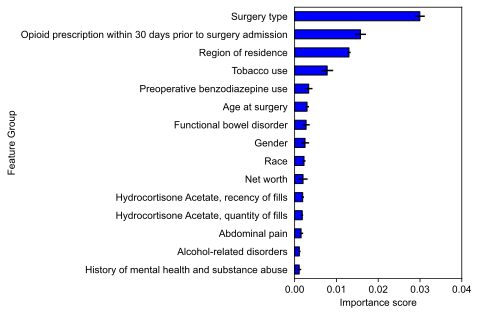

In [9]:
fig, ax = plt.subplots(figsize=(3,5))
df_refill_svm.sort_values(by=['means']).iloc[-15:].set_index('Feature Group').plot.barh(y='means', legend=False, color='blue', edgecolor='k', xerr='stds', ax=ax)
plt.xlim(0, 0.04)
plt.xlabel('Importance score')
ax.yaxis.set_ticks_position('none')
plt.savefig('fig/imp_refill_svm.svg', bbox_inches='tight')
plt.show()

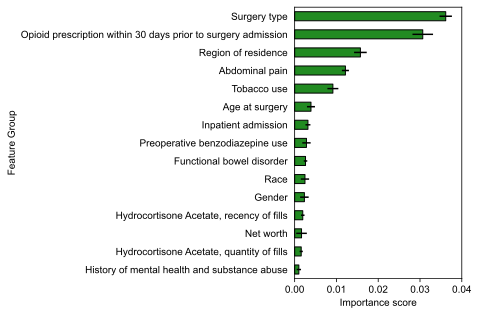

In [10]:
fig, ax = plt.subplots(figsize=(3,5))
df_refill_xgb.sort_values(by=['means']).iloc[-15:].set_index('Feature Group').plot.barh(y='means', legend=False, color='forestgreen', edgecolor='k', xerr='stds', ax=ax)
plt.xlim(0, 0.04)
plt.xlabel('Importance score')
ax.yaxis.set_ticks_position('none')
plt.savefig('fig/imp_refill_xgb.svg', bbox_inches='tight')
plt.show()

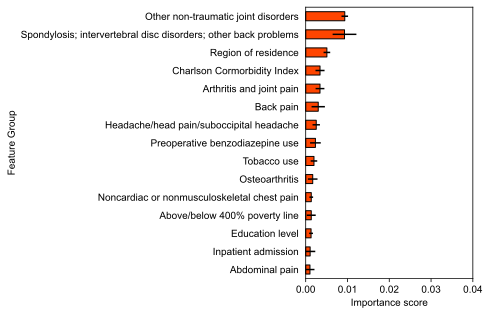

In [11]:
fig, ax = plt.subplots(figsize=(3,5))
df_pu_svm.sort_values(by=['means']).iloc[-15:].set_index('Feature Group').plot.barh(y='means', legend=False, color='orangered', edgecolor='k', xerr='stds', ax=ax)
plt.xlim(0, 0.04)
plt.xlabel('Importance score')
ax.yaxis.set_ticks_position('none')
plt.savefig('fig/imp_pu_svm.svg', bbox_inches='tight')
plt.show()

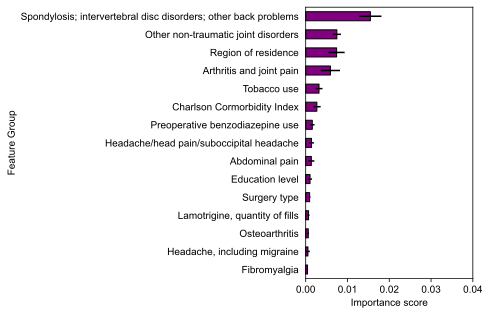

In [12]:
fig, ax = plt.subplots(figsize=(3,5))
ax = df_pu_xgb.sort_values(by=['means']).iloc[-15:].set_index('Feature Group').plot.barh(y='means', legend=False, color='purple', edgecolor='k', xerr='stds', ax=ax)
plt.xlim(0, 0.04)
plt.xlabel('Importance score')
ax.yaxis.set_ticks_position('none')
plt.savefig('fig/imp_pu_xgb.svg', bbox_inches='tight')
plt.show()